# Proyecto Compatibilidad
#### Emilia Salazar Leipen
#### Daniel Darwich Harari
#### Santiago Herrero Guzmán

Inicializamos importando todas las librerías necesarias para poder correr nuestro proyecto

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import plotly.express as px
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.metrics import Precision, Recall

Abrimos nuestro archivo de datos y creamos dos arreglos, el primero "y" con la salida que es 0 para cuando la relación no funcionó y 1 para cuando la relación sigue funcionado.
De la misma manera tenemos un arreglo "x" con las 31 características que utilizamos para entrenar a nuestro modelo

In [ ]:
file_path = '/content/drive/MyDrive/MINI_PROYECTO_AI/Google Sheets Dataset (2).csv'
df = pd.read_csv(file_path)

df.head()

x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


x = np.array(x)
y = np.array(y)

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (126, 31)
y shape: (126,)


Creamos una gráfica de barras para visualizar la distribución de las etiquetas de salida, que indica si la relación funcionó o no. Primero, obtenemos las etiquetas únicas y sus respectivas frecuencias. Luego, asignamos etiquetas descriptivas ("no funcionó" y "sí funcionó") y usamos plt.bar para graficar la cantidad de cada una. Personalizamos la gráfica con un color rosa, rotamos las etiquetas en el eje X para mejorar la legibilidad y añadimos títulos y etiquetas a los ejes para darle contexto a la visualización.

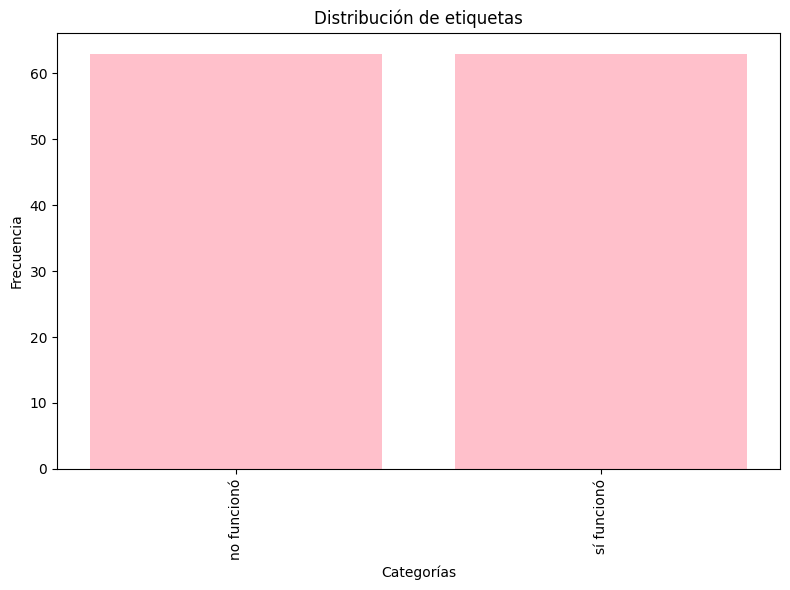

In [ ]:
plt.figure(figsize=(8, 6))

labels, counts = np.unique(y, return_counts=True)

label_names = ['no funcionó' if label == 0 else 'sí funcionó' for label in labels]


plt.bar(label_names, counts, color='pink')

plt.xticks(rotation=90)

plt.title('Distribución de etiquetas')
plt.ylabel('Frecuencia')
plt.xlabel('Categorías')

plt.tight_layout()
plt.show()

Dividimos nuestro conjunto de datos en entrenamiento y prueba utilizando la función train_test_split. Los vectores de entrada x y las etiquetas de salida y se dividen de manera que el 80% de los datos se utilicen para entrenar el modelo (trainVectors y trainLabels), mientras que el 20% restante se reserva para pruebas (testVectors y testLabels). Además, activamos el parámetro shuffle=True para asegurarnos de que los datos se mezclen aleatoriamente antes de ser divididos, lo que mejora la representatividad de los subconjuntos.

In [ ]:
trainVectors, testVectors, trainLabels, testLabels = train_test_split( x, y, test_size=0.2, shuffle=True)

Creamos un modelo secuencial de red neuronal para realizar clasificación binaria. Empezamos añadiendo capas densas con 256, 128 y 64 neuronas, todas utilizando la activación ReLU, que introduce no linealidad. La capa de salida tiene una sola neurona con activación sigmoide, lo que permite interpretar la salida como una probabilidad de pertenencia a la clase 1. Usamos el optimizador Adam con una tasa de aprendizaje de 0.0005 y la función de pérdida binary_crossentropy para ajustar el modelo. Entrenamos el modelo en 15 épocas con un 20% de los datos reservados para validación. Finalmente, realizamos predicciones en el conjunto de prueba, convirtiendo las probabilidades en clases binarias (0 o 1) y calculamos métricas de rendimiento como precisión, recall, F1-score y exactitud para evaluar el modelo.

In [ ]:
# Se crea un modelo secuencial, donde las capas se apilan secuencialmente.
model_1 = Sequential()

# Primera capa de entrada con la dimensión de las características de entrada.
model_1.add(Input(shape=(trainVectors.shape[1],)))

# Se agrega una capa densa (fully connected) con 256 neuronas y activación ReLU.
model_1.add(Dense(256, activation='relu'))

# Se agrega una segunda capa densa con 128 neuronas y activación ReLU.
model_1.add(Dense(128, activation='relu'))

# Se agrega una tercera capa densa con 64 neuronas y activación ReLU.
model_1.add(Dense(64, activation='relu'))

# Se agrega la capa de salida con una sola neurona (ya que es una clasificación binaria) y activación sigmoide.
model_1.add(Dense(1, activation='sigmoid'))

# Se define el optimizador Adam con una tasa de aprendizaje personalizada de 0.0005.
optimizer = Adam(learning_rate=0.0005)

# Compilamos el modelo especificando el optimizador Adam, la función de pérdida para clasificación binaria (binary_crossentropy),
# y la métrica de precisión (accuracy) para monitorear el rendimiento durante el entrenamiento.
model_1.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy', Precision(), Recall()])

# Entrenamos el modelo con los datos de entrenamiento (trainVectors y trainLabels).
history = model_1.fit(trainVectors, trainLabels, epochs=10, batch_size=24, validation_split=0.2)

# Realizamos predicciones en el conjunto de prueba (testVectors), obteniendo las probabilidades de pertenencia a la clase 1.
y_pred_proba = model_1.predict(testVectors)

# Convertimos las probabilidades en clases binarias. Si la probabilidad es mayor a 0.5, clasificamos como 1, de lo contrario, como 0.
y_pred_classes = (y_pred_proba > 0.5).astype(int)

# Cálculo de las métricas de evaluación: precisión, recall, F1-score y accuracy.
# El average='weighted' asegura que se tome en cuenta el desequilibrio en las clases.
precision = precision_score(testLabels, y_pred_classes, average='weighted') * 100
recall = recall_score(testLabels, y_pred_classes, average='weighted') * 100
f1 = f1_score(testLabels, y_pred_classes, average='weighted') * 100
accuracy = accuracy_score(testLabels, y_pred_classes) * 100

# Se imprimen las métricas obtenidas para evaluar el rendimiento del modelo.
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.4839 - loss: 0.7244 - precision_10: 0.4074 - recall_10: 0.3347 - val_accuracy: 0.6500 - val_loss: 0.5837 - val_precision_10: 0.6316 - val_recall_10: 1.0000
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5950 - loss: 0.6211 - precision_10: 0.5559 - recall_10: 1.0000 - val_accuracy: 0.7000 - val_loss: 0.5517 - val_precision_10: 0.6667 - val_recall_10: 1.0000
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7656 - loss: 0.5560 - precision_10: 0.7029 - recall_10: 0.8853 - val_accuracy: 0.7500 - val_loss: 0.6099 - val_precision_10: 0.8889 - val_recall_10: 0.6667
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7739 - loss: 0.5548 - precision_10: 0.8560 - recall_10: 0.5997 - val_accuracy: 0.7500 - val_loss: 0.5212 - val_precision_10: 0.7059 - val_recall_10: 1.0000
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7808 - loss: 0.5119 - precision_10: 0.7013 - recall_10: 0.96

Este código implementa una red neuronal manual con tres capas ocultas para realizar predicciones binarias. Primero, se definen las funciones de activación y gradiente de la función sigmoidal para ser utilizadas en la propagación hacia adelante y hacia atrás. Luego, se inicializan aleatoriamente los pesos de las capas. Durante el entrenamiento, se lleva a cabo el proceso de propagación hacia adelante para calcular las salidas, seguido de la propagación hacia atrás para ajustar los pesos mediante el algoritmo de retropropagación. Una vez entrenado, el modelo se utiliza para hacer predicciones sobre los datos de prueba. Finalmente, se calculan métricas como precisión, recall, F1-score y exactitud para evaluar el rendimiento del modelo.

In [ ]:
"""
Esta primera parte de la función define las funciones de activación y gradiente de la función sigmoidal,
utilizadas en la propagación hacia adelante y hacia atrás durante el entrenamiento de la red neuronal.
"""
def sigmoidal(z):
    return 1 / (1 + np.exp(-z))

def sigmoidalGradiente(z):
    g = sigmoidal(z)
    return g * (1 - g)

"""
Función para inicializar los pesos de manera aleatoria.
L_in es el tamaño de la capa de entrada, y L_out es el tamaño de la capa de salida.
e es el rango utilizado para los valores inicializados.
"""
def randInicializacionPesos(L_in, L_out):
    e = 0.12
    W = np.random.uniform(-e, e, (L_out, L_in))
    return W

"""
Función principal que entrena la red neuronal con tres capas ocultas.
input_layer_size: tamaño de la capa de entrada
hidden_layer_size_1, _2, _3: tamaños de las tres capas ocultas
num_labels: número de etiquetas de salida
X: matriz de datos de entrada
y: vector de etiquetas de salida
"""
def entrenaRN(input_layer_size, hidden_layer_size_1, hidden_layer_size_2, hidden_layer_size_3, num_labels, X, y):

    # Inicialización aleatoria de los pesos para cada capa y los biases correspondientes
    params = {
        'W1': randInicializacionPesos(input_layer_size, hidden_layer_size_1),
        'W2': randInicializacionPesos(hidden_layer_size_1, hidden_layer_size_2),
        'W3': randInicializacionPesos(hidden_layer_size_2, hidden_layer_size_3),
        'W4': randInicializacionPesos(hidden_layer_size_3, num_labels),
        'B1': np.zeros((hidden_layer_size_1, 1)),
        'B2': np.zeros((hidden_layer_size_2, 1)),
        'B3': np.zeros((hidden_layer_size_3, 1)),
        'B4': np.zeros((num_labels, 1))
    }

    # Inicialización de hiperparámetros
    error = 5
    nu = 0.01  # tasa de aprendizaje
    m = X.shape[0]  # número de muestras de entrenamiento
    iterations = 0

    # Proceso de entrenamiento hasta que el error total sea menor que 0.05
    while error > 0.05:
        iterations += 1
        error_total = 0

        # Propagación hacia adelante y hacia atrás para cada ejemplo de entrenamiento
        for i in range(m):
            input_x = X[i].reshape(-1, 1)

            # FORWARD PROPAGATION
            # Capa oculta 1
            N_hidden_layer_1 = np.dot(params['W1'], input_x) + params['B1']
            O_hidden_layer_1 = sigmoidal(N_hidden_layer_1)

            # Capa oculta 2
            N_hidden_layer_2 = np.dot(params['W2'], O_hidden_layer_1) + params['B2']
            O_hidden_layer_2 = sigmoidal(N_hidden_layer_2)

            # Capa oculta 3
            N_hidden_layer_3 = np.dot(params['W3'], O_hidden_layer_2) + params['B3']
            O_hidden_layer_3 = sigmoidal(N_hidden_layer_3)

            # Capa de salida
            N_output_layer = np.dot(params['W4'], O_hidden_layer_3) + params['B4']
            O_output_layer = sigmoidal(N_output_layer)

            Y = y[i]  # etiqueta real

            # Cálculo del error en el ejemplo actual
            error_ejemplo = 0.5 * np.sum((Y - O_output_layer) ** 2)
            error_total += error_ejemplo

            # BACKPROPAGATION
            # Cálculo del error en la capa de salida
            E_output_layer = (O_output_layer - Y) * sigmoidalGradiente(N_output_layer)

            # Cálculo del error en las capas ocultas
            E_hidden_layer_3 = np.dot(params['W4'].T, E_output_layer) * sigmoidalGradiente(N_hidden_layer_3)
            E_hidden_layer_2 = np.dot(params['W3'].T, E_hidden_layer_3) * sigmoidalGradiente(N_hidden_layer_2)
            E_hidden_layer_1 = np.dot(params['W2'].T, E_hidden_layer_2) * sigmoidalGradiente(N_hidden_layer_1)

            # ACTUALIZACIÓN DE PESOS Y BIAS
            params['W4'] -= nu * np.dot(E_output_layer, O_hidden_layer_3.T)
            params['B4'] -= nu * E_output_layer
            params['W3'] -= nu * np.dot(E_hidden_layer_3, O_hidden_layer_2.T)
            params['B3'] -= nu * E_hidden_layer_3
            params['W2'] -= nu * np.dot(E_hidden_layer_2, O_hidden_layer_1.T)
            params['B2'] -= nu * E_hidden_layer_2
            params['W1'] -= nu * np.dot(E_hidden_layer_1, input_x.T)
            params['B1'] -= nu * E_hidden_layer_1

        # Cálculo del error promedio en todas las muestras
        error = error_total / m

    # Entrenamiento completado
    print(f"Entrenamiento completado en {iterations} iteraciones con un error final de: {error:.6f}")
    return params


"""
Función para hacer predicciones utilizando los pesos entrenados.
Realiza propagación hacia adelante con los pesos entrenados para predecir las etiquetas.
X: matriz de datos de entrada
W1, b1, W2, b2, W3, b3, W4, b4: pesos y bias entrenados de las capas
"""
def prediceRNYaEntrenada(X, W1, b1, W2, b2, W3, b3, W4, b4):
    Z1 = np.dot(X, W1.T) + b1.T
    A1 = sigmoidal(Z1)
    Z2 = np.dot(A1, W2.T) + b2.T
    A2 = sigmoidal(Z2)
    Z3 = np.dot(A2, W3.T) + b3.T
    A3 = sigmoidal(Z3)
    Z4 = np.dot(A3, W4.T) + b4.T
    A4 = sigmoidal(Z4)

    y_pred = (A4 >= 0.5).astype(int)  # Se predice 1 si la salida es >= 0.5, de lo contrario 0
    return y_pred, A4

# Definición de parámetros de la red neuronal
input_layer_size = trainVectors.shape[1]
hidden_layer_size_1 = 256
hidden_layer_size_2 = 128
hidden_layer_size_3 = 64
num_labels = 1

# Entrenamos la red neuronal con los datos de entrenamiento
params_entrenados = entrenaRN(input_layer_size, hidden_layer_size_1, hidden_layer_size_2, hidden_layer_size_3, num_labels, trainVectors, trainLabels)
model_2 = params_entrenados

# Probamos la red neuronal con los datos de prueba
y_pred_manual, y_pred_proba_manual = prediceRNYaEntrenada(testVectors, params_entrenados['W1'], params_entrenados['B1'],
                                                          params_entrenados['W2'], params_entrenados['B2'],
                                                          params_entrenados['W3'], params_entrenados['B3'],
                                                          params_entrenados['W4'], params_entrenados['B4'])

# Aplanamos las predicciones y etiquetas reales para calcular las métricas
y_pred_flat_manual = y_pred_manual.flatten()
y_real_flat_manual = testLabels.flatten()

# Cálculo de las métricas de rendimiento (accuracy, precision, recall, F1-score)
accuracy_manual = accuracy_score(y_real_flat_manual, y_pred_flat_manual) * 100
precision_manual = precision_score(y_real_flat_manual, y_pred_flat_manual) * 100
recall_manual = recall_score(y_real_flat_manual, y_pred_flat_manual) * 100
f1_manual = f1_score(y_real_flat_manual, y_pred_flat_manual) * 100

# Impresión de los resultados
print(f"Accuracy: {accuracy_manual:.2f}")
print(f'Recall: {recall_manual:.4f}')
print(f'Precision: {precision_manual:.4f}')
print(f'F1 Score: {f1_manual:.4f}')


Entrenamiento completado en 413 iteraciones con un error final de: 0.049952
Accuracy: 88.46
Recall: 100.0000
Precision: 82.3529
F1 Score: 90.3226


Inicializamos un clasificador MLP (Multi-Layer Perceptron) con tres capas ocultas de 256, 128 y 64 neuronas. Usamos la función de activación ReLU y el optimizador Adam, con una tasa de aprendizaje de 0.0005. El entrenamiento se realiza en 100 épocas como máximo usando los datos de entrenamiento (trainVectors y trainLabels). Luego, realizamos predicciones en los datos de prueba (testVectors) y obtenemos tanto las clases predichas como las probabilidades asociadas a la clase positiva. Finalmente, calculamos las métricas de rendimiento, incluyendo la precisión, el recall, el F1-score y la exactitud, y mostramos estos resultados para evaluar el desempeño del modelo en el conjunto de prueba.

In [ ]:
# Inicializamos el clasificador MLP (Multi-Layer Perceptron) con tres capas ocultas: 256, 128, y 64 neuronas.
# Se especifica la función de activación ReLU y el optimizador Adam.
# learning_rate_init define la tasa de aprendizaje inicial y max_iter define el número máximo de iteraciones (épocas).
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64),
                    activation='relu',
                    solver='adam',
                    learning_rate_init=0.0005,
                    max_iter=100,
                    random_state=42)

# Entrenamos el modelo MLP con los datos de entrenamiento (trainVectors y trainLabels).
mlp.fit(trainVectors, trainLabels)
model_3 = mlp

# Realizamos predicciones en el conjunto de prueba (testVectors) para obtener las clases predichas.
y_pred_scikit = mlp.predict(testVectors)

# También obtenemos las probabilidades de la clase positiva (1) usando predict_proba. Seleccionamos la columna 1 que contiene las probabilidades de la clase 1.
y_pred_proba_scikit = mlp.predict_proba(testVectors)[:, 1]

# Calculamos las métricas de rendimiento:
# accuracy_score mide el porcentaje de predicciones correctas.
# precision_score mide la proporción de verdaderos positivos entre todas las predicciones positivas.
# recall_score mide la proporción de verdaderos positivos entre todos los ejemplos positivos reales.
# f1_score es la media armónica de la precisión y el recall.
accuracy_scikit = accuracy_score(testLabels, y_pred_scikit) * 100
precision_scikit = precision_score(testLabels, y_pred_scikit, average='weighted') * 100
recall_scikit = recall_score(testLabels, y_pred_scikit, average='weighted') * 100
f1_scikit = f1_score(testLabels, y_pred_scikit, average='weighted') * 100

# Se imprimen las métricas obtenidas para evaluar el rendimiento del modelo en el conjunto de prueba.
print(f'Accuracy: {accuracy_scikit:.4f}')
print(f'Precision: {precision_scikit:.4f}')
print(f'Recall: {recall_scikit:.4f}')
print(f'F1 Score: {f1_scikit:.4f}')


Accuracy: 80.7692
Precision: 81.0651
Recall: 80.7692
F1 Score: 80.7977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Esta función compara gráficamente las métricas de rendimiento (F1 score, exactitud, recall y precisión) entre tres modelos: el modelo basado en Keras, un modelo entrenado manualmente, y el modelo entrenado con Scikit-learn. Para ello, se definen arreglos que contienen los valores de cada métrica para los tres modelos, y luego se utiliza matplotlib para crear un gráfico de barras agrupadas, donde cada barra representa una métrica. Las barras se colocan lado a lado para cada modelo, lo que facilita la comparación visual de su desempeño en cada una de las métricas. Se añaden etiquetas y un título a los ejes, y se muestra una leyenda para identificar cada métrica.

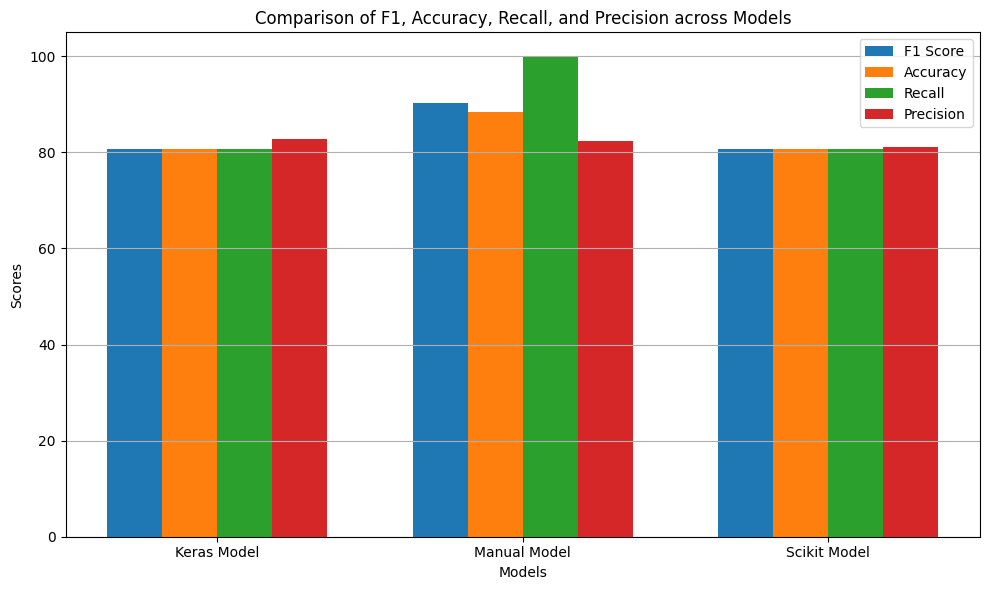

In [ ]:
def plot_model_metrics(f1, f1_manual, f1_scikit, accuracy, accuracy_manual, accuracy_scikit,
                       recall, recall_manual, recall_scikit, precision, precision_manual, precision_scikit):

    model_names = ['Keras Model', 'Manual Model', 'Scikit Model']

    f1_scores = [f1, f1_manual, f1_scikit]
    accuracy_scores = [accuracy, accuracy_manual, accuracy_scikit]
    recall_scores = [recall, recall_manual, recall_scikit]
    precision_scores = [precision, precision_manual, precision_scikit]

    bar_width = 0.18

    fig, ax = plt.subplots(figsize=(10, 6))

    index = np.arange(len(model_names))


    ax.bar(index, f1_scores, bar_width, label='F1 Score')
    ax.bar(index + bar_width, accuracy_scores, bar_width, label='Accuracy')
    ax.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
    ax.bar(index + 3 * bar_width, precision_scores, bar_width, label='Precision')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of F1, Accuracy, Recall, and Precision across Models')
    ax.set_xticks(index + 1.5 * bar_width)
    ax.set_xticklabels(model_names)
    ax.legend()

    ax.yaxis.grid(True)

    plt.tight_layout()
    plt.show()

plot_model_metrics(f1, f1_manual, f1_scikit, accuracy, accuracy_manual, accuracy_scikit, recall, recall_manual, recall_scikit, precision, precision_manual, precision_scikit)


Este código grafica las curvas ROC (Receiver Operating Characteristic) para los tres modelos: Manual, Scikit-learn y Keras, con el objetivo de comparar sus capacidades para clasificar correctamente. Primero, se calculan las tasas de falsos positivos (fpr) y verdaderos positivos (tpr), así como el Área Bajo la Curva (AUC) para cada modelo utilizando roc_curve y auc. Luego, se grafican las curvas ROC de los tres modelos con diferentes colores, donde cada curva muestra la relación entre las tasas de falsos y verdaderos positivos. También se incluye una línea diagonal que representa un clasificador aleatorio, y se añaden etiquetas, un título y una leyenda para facilitar la interpretación visual de las curvas.

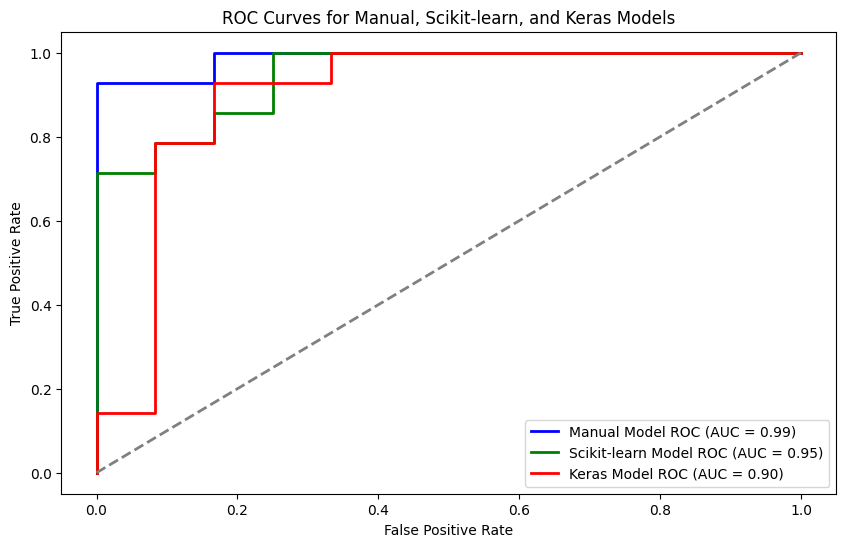

In [ ]:
fpr_manual, tpr_manual, _ = roc_curve(testLabels, y_pred_proba_manual)
roc_auc_manual = auc(fpr_manual, tpr_manual)

fpr_scikit, tpr_scikit, _ = roc_curve(testLabels, y_pred_proba_scikit)
roc_auc_scikit = auc(fpr_scikit, tpr_scikit)

fpr_keras, tpr_keras, _ = roc_curve(testLabels, y_pred_proba)
roc_auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(10, 6))

plt.plot(fpr_manual, tpr_manual, color='blue', lw=2, label=f'Manual Model ROC (AUC = {roc_auc_manual:.2f})')

plt.plot(fpr_scikit, tpr_scikit, color='green', lw=2, label=f'Scikit-learn Model ROC (AUC = {roc_auc_scikit:.2f})')

plt.plot(fpr_keras, tpr_keras, color='red', lw=2, label=f'Keras Model ROC (AUC = {roc_auc_keras:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Manual, Scikit-learn, and Keras Models')
plt.legend(loc="lower right")

plt.show()

Este código compara las matrices de confusión de tres modelos: Manual, Scikit-learn y Keras, utilizando gráficos de calor para visualizar el rendimiento de clasificación. Cada modelo tiene su propia matriz de confusión calculada con confusion_matrix, que muestra las predicciones correctas e incorrectas para las clases "no funcionó" y "sí funcionó". Usamos sns.heatmap de Seaborn para graficar estas matrices, donde cada celda muestra el número de ejemplos correctamente o incorrectamente clasificados. Cada gráfico incluye etiquetas en los ejes para representar las clases reales y predichas, y se utilizan diferentes paletas de colores para distinguir visualmente los gráficos de los tres modelos. Las matrices se muestran lado a lado para facilitar la comparación directa entre los modelos.

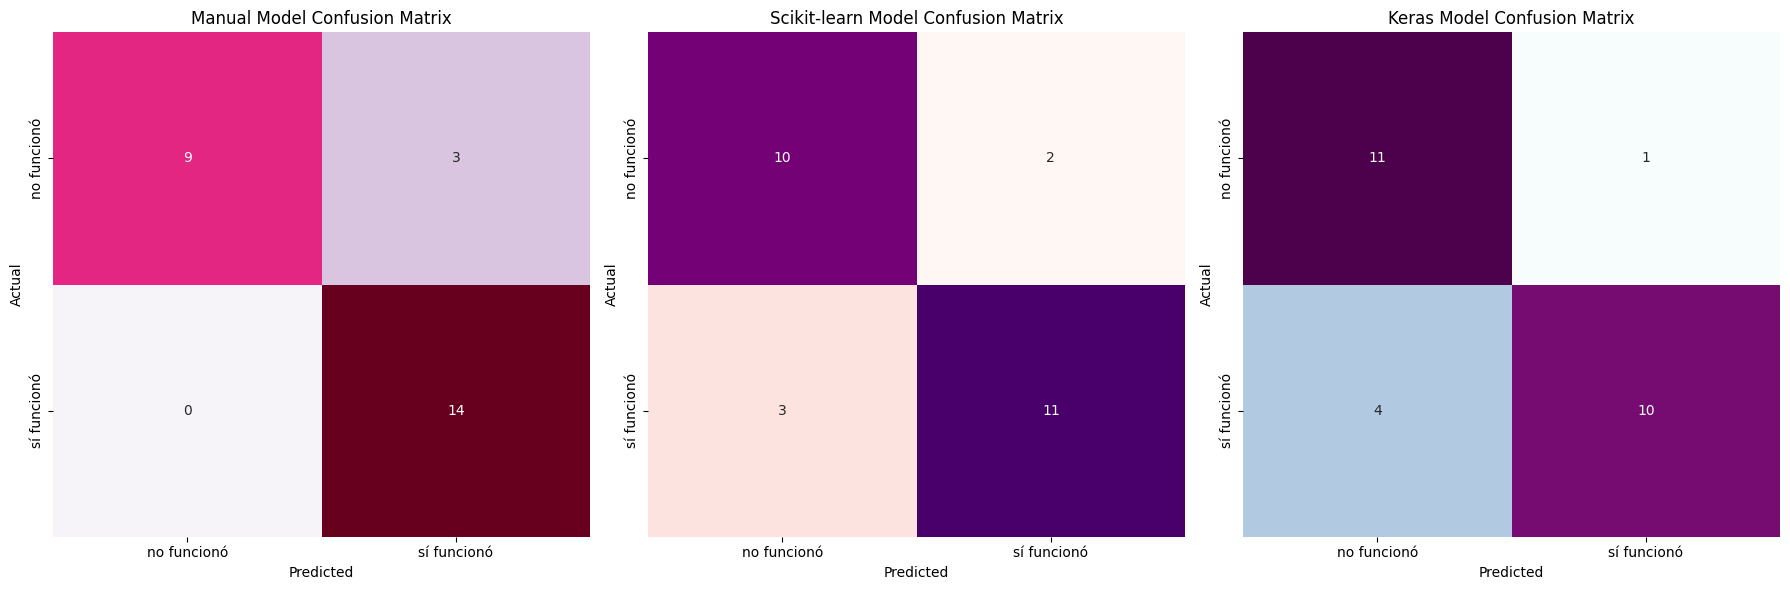

In [ ]:
cm_manual = confusion_matrix(testLabels, y_pred_flat_manual)
cm_scikit = confusion_matrix(testLabels, y_pred_scikit)
cm_keras = confusion_matrix(testLabels, y_pred_classes)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_manual, annot=True, fmt='d', cmap='PuRd', cbar=False,
            xticklabels=['no funcionó', 'sí funcionó'], yticklabels=['no funcionó', 'sí funcionó'], ax=axes[0])
axes[0].set_title('Manual Model Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_scikit, annot=True, fmt='d', cmap='RdPu', cbar=False,
            xticklabels=['no funcionó', 'sí funcionó'], yticklabels=['no funcionó', 'sí funcionó'], ax=axes[1])
axes[1].set_title('Scikit-learn Model Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_keras, annot=True, fmt='d', cmap='BuPu', cbar=False,
            xticklabels=['no funcionó', 'sí funcionó'], yticklabels=['no funcionó', 'sí funcionó'], ax=axes[2])
axes[2].set_title('Keras Model Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Este código calcula y visualiza la matriz de correlación entre las características del conjunto de datos y la etiqueta de salida ("Target"). Primero, se crea un DataFrame con las 31 características, asignando nombres descriptivos a cada una según la lista feature_names. Luego, se agrega una columna "Target" que representa las etiquetas de entrenamiento. A continuación, se calcula la correlación entre todas las variables usando data.corr() y se grafica utilizando un gráfico de calor (heatmap) con Seaborn para resaltar las relaciones entre las características y la etiqueta. Las celdas del heatmap muestran los coeficientes de correlación, y se usa una paleta de colores coolwarm para representar visualmente la magnitud y dirección de las correlaciones.

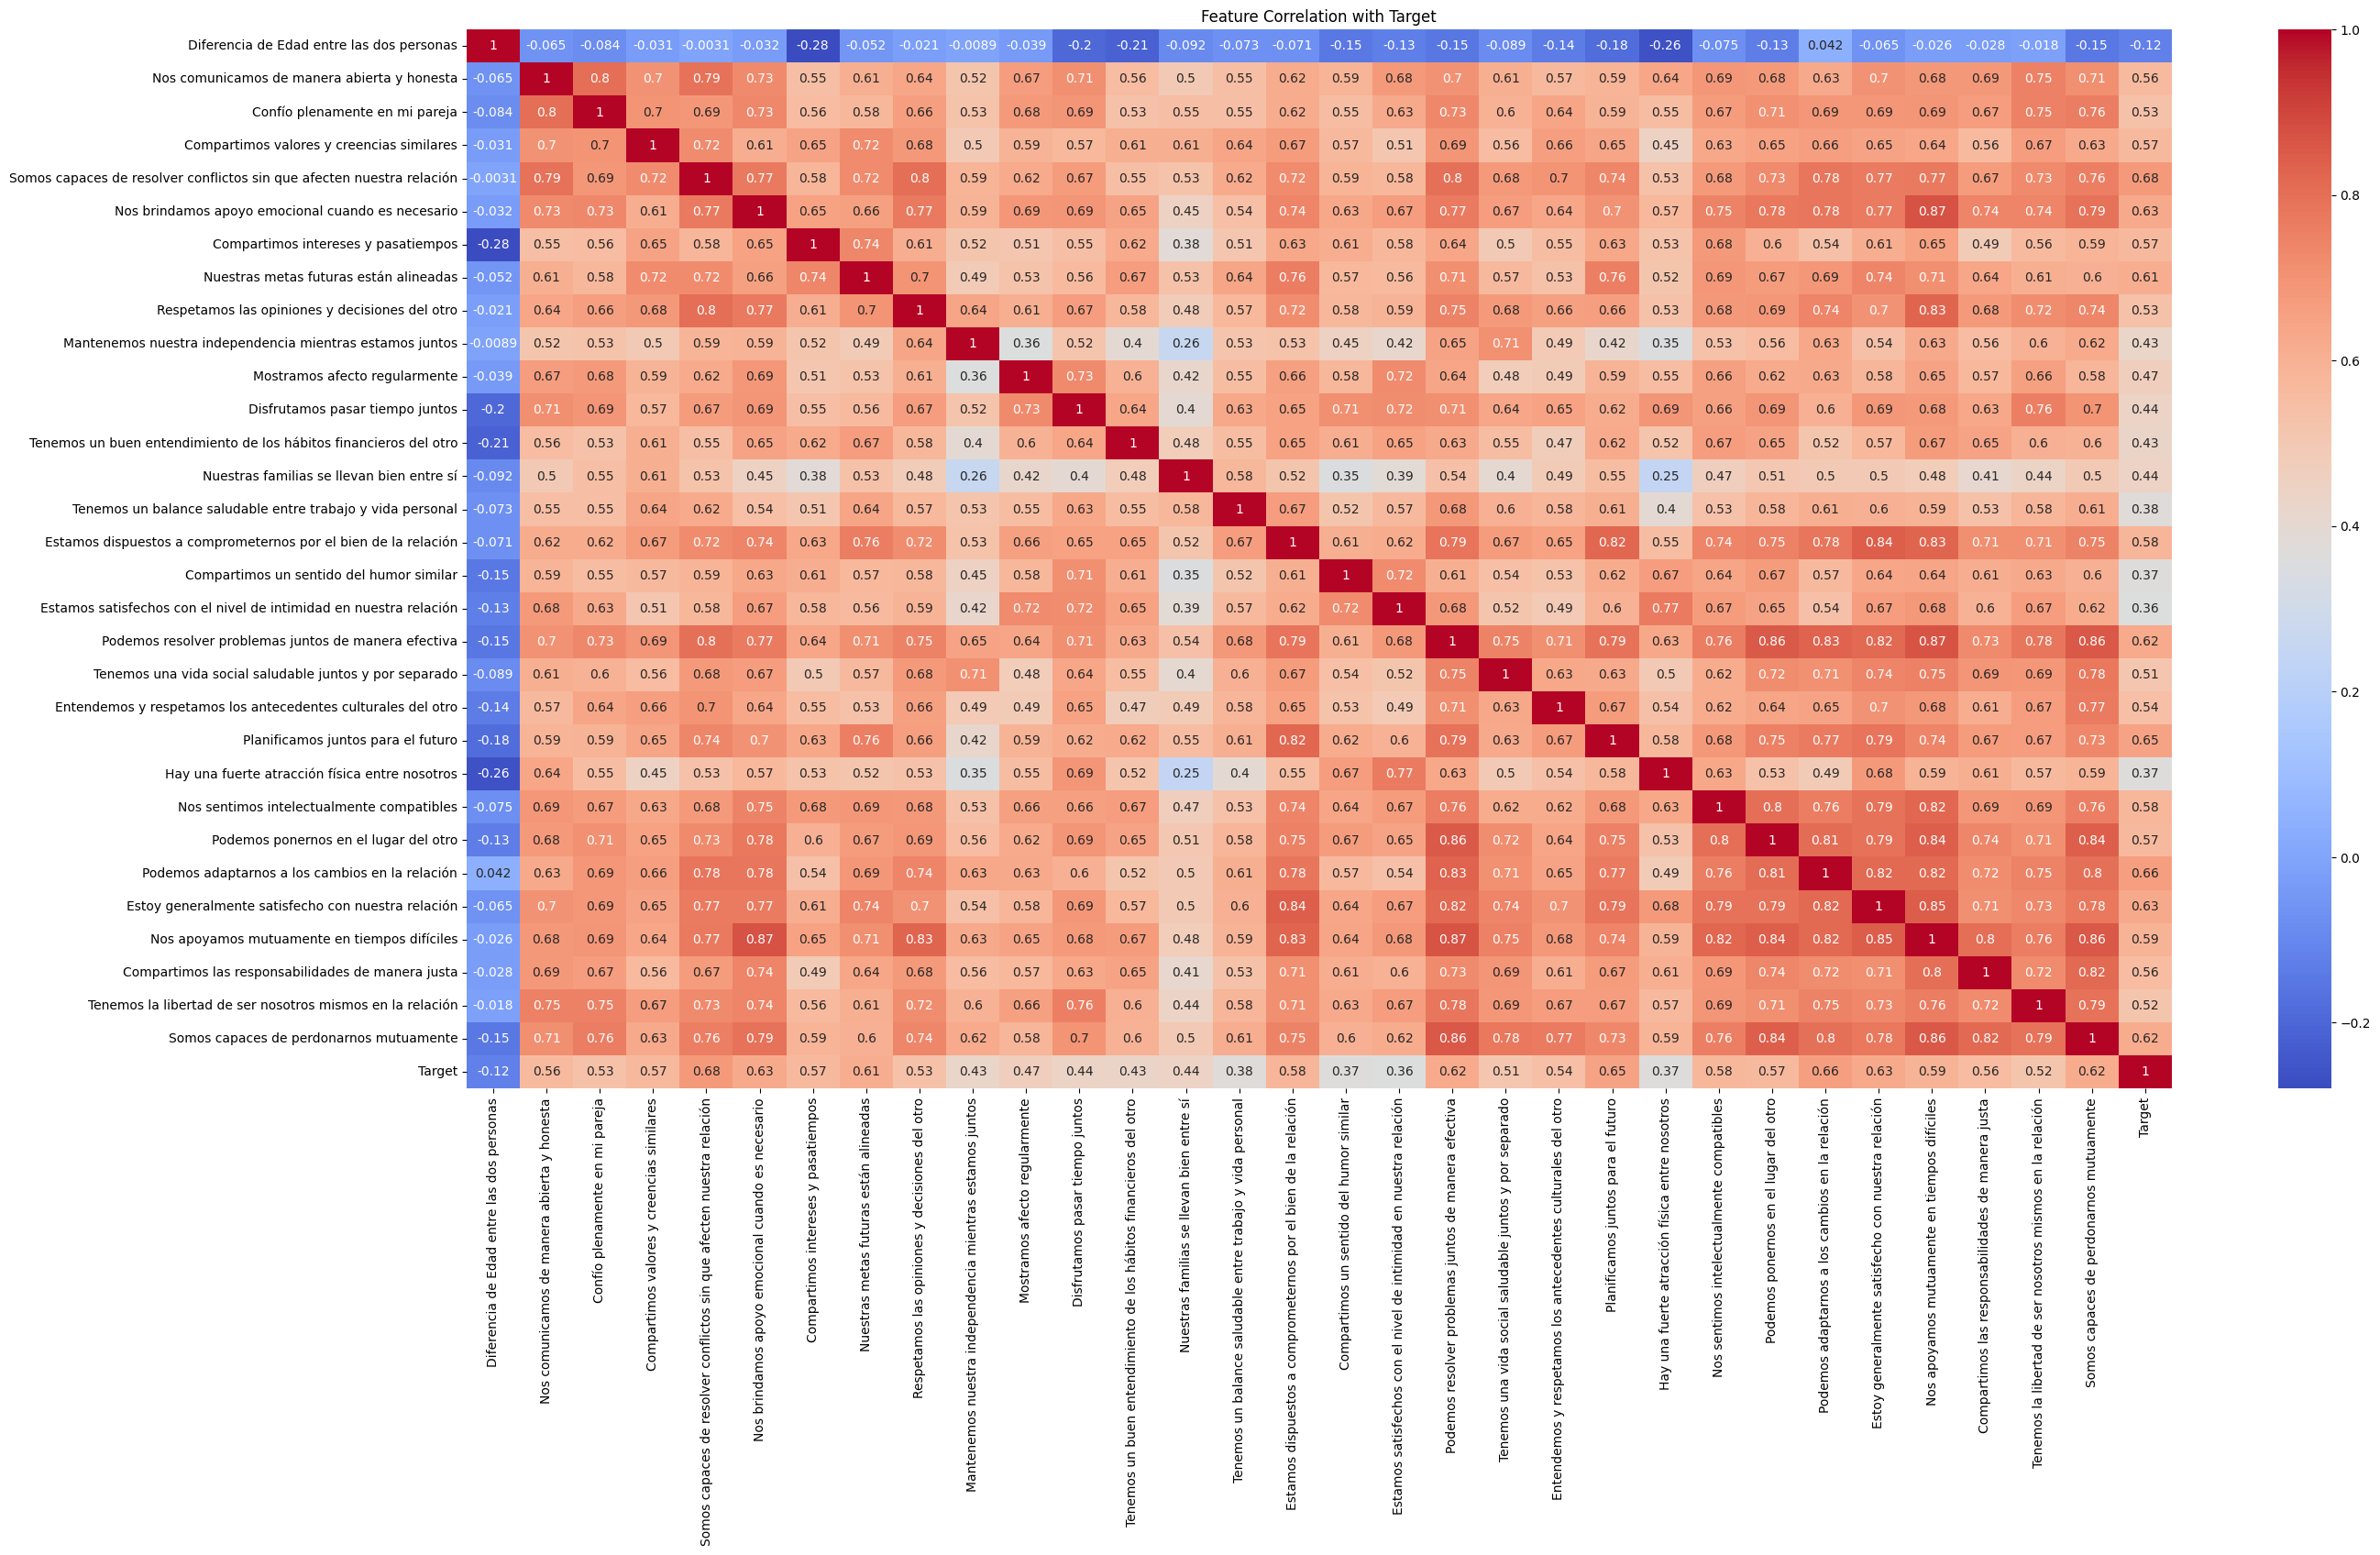

In [ ]:
feature_names = [
    "Diferencia de Edad entre las dos personas",
    "Nos comunicamos de manera abierta y honesta",
    "Confío plenamente en mi pareja",
    "Compartimos valores y creencias similares",
    "Somos capaces de resolver conflictos sin que afecten nuestra relación",
    "Nos brindamos apoyo emocional cuando es necesario",
    "Compartimos intereses y pasatiempos",
    "Nuestras metas futuras están alineadas",
    "Respetamos las opiniones y decisiones del otro",
    "Mantenemos nuestra independencia mientras estamos juntos",
    "Mostramos afecto regularmente",
    "Disfrutamos pasar tiempo juntos",
    "Tenemos un buen entendimiento de los hábitos financieros del otro",
    "Nuestras familias se llevan bien entre sí",
    "Tenemos un balance saludable entre trabajo y vida personal",
    "Estamos dispuestos a comprometernos por el bien de la relación",
    "Compartimos un sentido del humor similar",
    "Estamos satisfechos con el nivel de intimidad en nuestra relación",
    "Podemos resolver problemas juntos de manera efectiva",
    "Tenemos una vida social saludable juntos y por separado",
    "Entendemos y respetamos los antecedentes culturales del otro",
    "Planificamos juntos para el futuro",
    "Hay una fuerte atracción física entre nosotros",
    "Nos sentimos intelectualmente compatibles",
    "Podemos ponernos en el lugar del otro",
    "Podemos adaptarnos a los cambios en la relación",
    "Estoy generalmente satisfecho con nuestra relación",
    "Nos apoyamos mutuamente en tiempos difíciles",
    "Compartimos las responsabilidades de manera justa",
    "Tenemos la libertad de ser nosotros mismos en la relación",
    "Somos capaces de perdonarnos mutuamente"
]


data = pd.DataFrame(trainVectors, columns=feature_names)
data['Target'] = trainLabels

corr = data.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()



# Fase 2
En esta segunda fase del proyecto, optimizamos el modelo eliminando características irrelevantes, agregando capas de Dropout para evitar el sobreajuste, e implementando K-Fold Cross Validation para evaluar su robustez en diferentes subconjuntos de datos. Además, ajustamos el umbral de clasificación de 0.5 a 0.6 para mejorar la precisión, reduciendo falsos positivos.

In [ ]:
columns_to_drop = [ 9, 14, 16, 17]

trainVectors_2 = np.delete(trainVectors, columns_to_drop, axis=1)
testVectors_2 = np.delete(testVectors, columns_to_drop, axis=1)

print("Updated trainVectors_2 shape:", trainVectors_2.shape)
print("Updated testVectors_2 shape:", testVectors_2.shape)

Updated trainVectors_2 shape: (100, 27)
Updated testVectors_2 shape: (26, 27)



Se entrenó un modelo secuencial (model_4) con cuatro capas ocultas de 128, 64, 32, y 16 neuronas, utilizando la función de activación ReLU en cada capa y una capa de salida con activación sigmoidal para realizar la clasificación binaria. Se utilizó el optimizador Adam con una tasa de aprendizaje de 0.0005 y la función de pérdida binary_crossentropy. El entrenamiento se realizó con validación cruzada de 5 pliegues (KFold) durante 10 épocas en cada pliegue, con un tamaño de lote de 12. Las métricas de rendimiento calculadas incluyeron precisión, recall, F1-score, y exactitud, que fueron promediadas al finalizar las iteraciones. Estas métricas proporcionaron una evaluación precisa del rendimiento del modelo, con un umbral de decisión de 0.6 para convertir las probabilidades en clases binarias.

In [ ]:
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(trainVectors_2):
    X_train, X_val = trainVectors_2[train_index], trainVectors_2[test_index]
    y_train, y_val = trainLabels[train_index], trainLabels[test_index]

    model_4 = Sequential()

    model_4.add(Input(shape=(trainVectors_2.shape[1],)))

    model_4.add(Dense(128, activation='relu'))
    model_4.add(Dense(64, activation='relu'))
    model_4.add(Dense(32, activation='relu'))
    model_4.add(Dense(16, activation='relu'))


    model_4.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.0005)
    model_4.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy', Precision(), Recall()])


    history = model_4.fit(X_train, y_train, epochs=10, batch_size=12, validation_data=(X_val, y_val), verbose=0)

    y_pred_proba = model_4.predict(X_val)

    y_pred_classes = (y_pred_proba > 0.6).astype(int)

    precision = precision_score(y_val, y_pred_classes, average='weighted') * 100
    recall = recall_score(y_val, y_pred_classes, average='weighted') * 100
    f1 = f1_score(y_val, y_pred_classes, average='weighted') * 100
    accuracy = accuracy_score(y_val, y_pred_classes) * 100

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

print(f'Precision: {np.mean(precision_scores):.2f}% ± {np.std(precision_scores):.2f}%')
print(f'Recall: {np.mean(recall_scores):.2f}% ± {np.std(recall_scores):.2f}%')
print(f'F1 Score: {np.mean(f1_scores):.2f}% ± {np.std(f1_scores):.2f}%')
print(f'Accuracy: {np.mean(accuracy_scores):.2f}% ± {np.std(accuracy_scores):.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Precision: 84.88% ± 5.53%
Recall: 83.00% ± 6.78%
F1 Score: 83.19% ± 6.53%
Accuracy: 83.00% ± 6.78%


Se construyó un modelo secuencial (model_5) con cuatro capas ocultas de 128, 64, 32, y 16 neuronas, utilizando la función de activación ReLU y aplicando una regularización mediante Dropout en cada capa con una tasa del 10% para mitigar el sobreajuste. La capa de salida utiliza activación sigmoidal para realizar la clasificación binaria. El modelo fue optimizado usando el optimizador Adam con una tasa de aprendizaje de 0.0005 y la función de pérdida binary_crossentropy. El entrenamiento se llevó a cabo durante 10 épocas, con un tamaño de lote de 24 y una división del 20% de los datos para validación. Después del entrenamiento, se realizaron predicciones con un umbral de decisión de 0.6, y las métricas de rendimiento obtenidas fueron precisión, recall, F1-score y exactitud.

In [ ]:
model_5 = Sequential()
model_5.add(Input(shape=(trainVectors_2.shape[1],)))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Dense(16, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0005)

model_5.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy', Precision(), Recall()])

history = model_5.fit(trainVectors_2, trainLabels, epochs=10, batch_size=24, validation_split=0.2)

y_pred_proba = model_5.predict(testVectors_2)

y_pred_classes = (y_pred_proba > 0.6).astype(int)

precision_k2 = precision_score(testLabels, y_pred_classes, average='weighted') * 100
recall_k2 = recall_score(testLabels, y_pred_classes, average='weighted') * 100
f1_k2 = f1_score(testLabels, y_pred_classes, average='weighted') * 100
accuracy_k2 = accuracy_score(testLabels, y_pred_classes) * 100

print(f'Precision: {precision_k2}')
print(f'Recall: {recall_k2}')
print(f'F1 Score: {f1_k2}')
print(f'Accuracy: {accuracy_k2}')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.5400 - loss: 1.0154 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 0.7004 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5881 - loss: 0.7382 - precision_40: 0.3286 - recall_40: 0.0626 - val_accuracy: 0.8500 - val_loss: 0.6494 - val_precision_40: 0.8462 - val_recall_40: 0.9167
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4853 - loss: 0.7348 - precision_40: 0.3303 - recall_40: 0.2000 - val_accuracy: 0.8000 - val_loss: 0.6229 - val_precision_40: 0.7500 - val_recall_40: 1.0000
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6361 - loss: 0.6357 - precision_40: 0.5906 - recall_40: 0.4466 - val_accuracy: 0.7000 - val_loss: 0.5968 - val_precision_40: 0.6667 - val_recall_40: 1.0000
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6294 - loss: 0.6680 - precision_40: 0.6798 -

La función plot_model_metrics toma como parámetros las métricas de F1, exactitud, recall y precisión para dos modelos (el "Keras Re Made Model" y el "K-Fold Model") y genera un gráfico de barras comparativo.

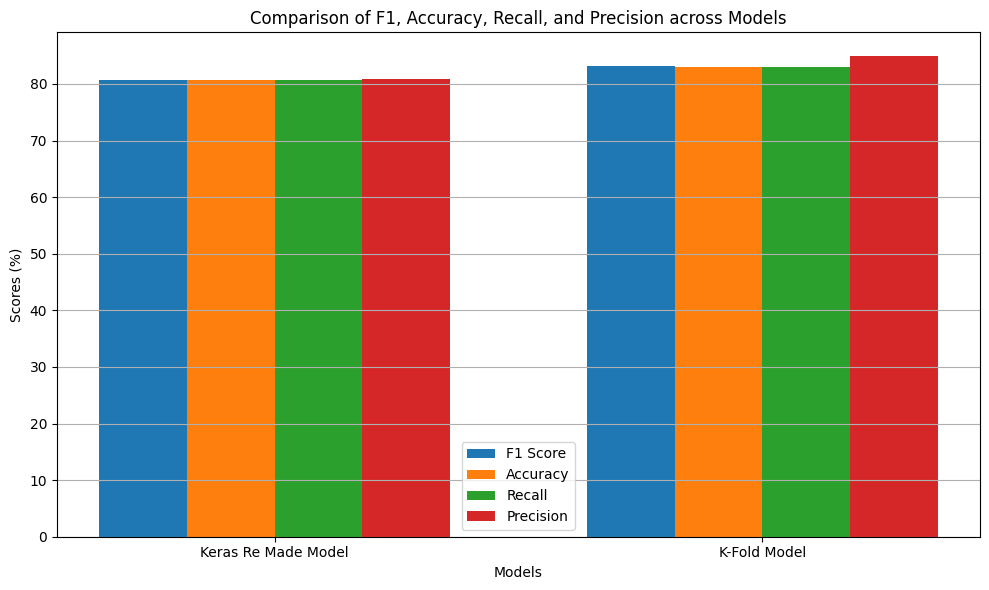

In [ ]:
def plot_model_metrics(f1_k2, f1_k_fold, accuracy_k2, accuracy_k_fold, recall_k2, recall_k_fold, precision_k2, precision_k_fold):
    model_names = ['Keras Re Made Model', 'K-Fold Model']

    f1_scores = [f1_k2, f1_k_fold]
    accuracy_scores = [accuracy_k2, accuracy_k_fold]
    recall_scores = [recall_k2, recall_k_fold]
    precision_scores = [precision_k2, precision_k_fold]

    bar_width = 0.18

    fig, ax = plt.subplots(figsize=(10, 6))

    index = np.arange(len(model_names))

    ax.bar(index, f1_scores, bar_width, label='F1 Score')
    ax.bar(index + bar_width, accuracy_scores, bar_width, label='Accuracy')
    ax.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
    ax.bar(index + 3 * bar_width, precision_scores, bar_width, label='Precision')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores (%)')
    ax.set_title('Comparison of F1, Accuracy, Recall, and Precision across Models')
    ax.set_xticks(index + 1.5 * bar_width)
    ax.set_xticklabels(model_names)
    ax.legend()

    ax.yaxis.grid(True)

    plt.tight_layout()
    plt.show()

plot_model_metrics(f1_k2, np.mean(f1_scores), accuracy_k2, np.mean(accuracy_scores), recall_k2, np.mean(recall_scores), precision_k2, np.mean(precision_scores))


Este código implementa una interfaz interactiva usando ipywidgets para predecir la compatibilidad de una relación basada en varias características, permitiendo al usuario ingresar valores mediante sliders para características como comunicación, confianza y apoyo emocional, así como la diferencia de edad entre las personas. Al presionar el botón de "Clasificar", se procesan los valores ingresados y se utilizan cinco modelos entrenados (Keras, manual, Scikit-learn, K-Fold y Dropout) para predecir si la relación funcionará o no. Luego, se calcula la predicción final utilizando la moda de las respuestas de los modelos y se muestra el porcentaje de compatibilidad basado en el promedio de las características, brindando una evaluación visual y precisa de las predicciones.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from collections import Counter


slider_style = {'description_width': 'initial'}
slider_layout = widgets.Layout(width='600px')

# Crear los sliders para todas las preguntas (del 1 al 5)
sliders = [
    widgets.IntSlider(value=3, min=1, max=5, step=1, description=q, style=slider_style, layout=slider_layout)
    for q in feature_names[1:]
]

# Campo de texto para la "Diferencia de Edad entre las dos personas"
edad_text = widgets.BoundedIntText(
    value=0,
    min=-50,
    max=50,
    description=feature_names[0],
    style=slider_style,
    layout=slider_layout
)

# Botón para realizar la predicción
boton = widgets.Button(description="Clasificar", layout=widgets.Layout(width='200px'))


output = widgets.Output()

# Función para eliminar columnas no necesarias antes de hacer predicciones
def drop_columns(input_data):
    columns_to_drop = [9, 14, 16, 17]  # Índices de las columnas a eliminar
    return np.delete(input_data, columns_to_drop, axis=1)

# Función que se ejecuta cuando se presiona el botón de predicción
def on_button_clicked(b):
    with output:
        output.clear_output()  # Limpiar cualquier resultado anterior

        # Obtener los valores de las respuestas
        input_data = [edad_text.value] + [slider.value for slider in sliders]

        # Convertir la entrada en un array NumPy
        input_data_array = np.array(input_data).reshape(1, -1)

        # Eliminar columnas irrelevantes para todos los modelos que usen 27 columnas
        input_data_reduced = drop_columns(input_data_array)

        # Realizar predicciones con los cinco modelos
        # Modelo Keras (todas las columnas)
        prediction_keras_proba = model_1.predict(input_data_array)[0][0]
        prediction_keras = "La relación sí funcionará" if prediction_keras_proba > 0.5 else "La relación no funcionará"

        # Modelo manual (aún usa todas las columnas)
        y_pred_manual, _ = prediceRNYaEntrenada(input_data_array,
                                                model_2['W1'], model_2['B1'],
                                                model_2['W2'], model_2['B2'],
                                                model_2['W3'], model_2['B3'],
                                                model_2['W4'], model_2['B4'])
        prediction_manual = "La relación sí funcionará" if y_pred_manual[0][0] == 1 else "La relación no funcionará"

        # Modelo Scikit-learn (aún usa todas las columnas)
        prediction_scikit_proba = model_3.predict_proba(input_data_array)[0][1]
        prediction_scikit = "La relación sí funcionará" if prediction_scikit_proba > 0.5 else "La relación no funcionará"

        # Modelo K-Fold (usa 27 columnas)
        prediction_kfold_proba = model_4.predict(input_data_reduced)[0][0]
        prediction_kfold = "La relación sí funcionará" if prediction_kfold_proba > 0.5 else "La relación no funcionará"

        # Modelo 5 con Dropout (usa 27 columnas)
        prediction_dropout_proba = model_5.predict(input_data_reduced)[0][0]
        prediction_dropout = "La relación sí funcionará" if prediction_dropout_proba > 0.5 else "La relación no funcionará"

        # Reunir todas las predicciones
        all_predictions = [
            prediction_keras,
            prediction_manual,
            prediction_scikit,
            prediction_kfold,
            prediction_dropout
        ]

        # Calcular la moda (predicción más común) usando collections.Counter
        final_prediction = Counter(all_predictions).most_common(1)[0][0]

        # Calcular el promedio de las características (excepto la edad)
        average_characteristics = np.mean(input_data[1:])  # Excluir la edad
        compatibility_percentage = average_characteristics * 20  # Escalar de 1-5 a 0-100%

        # Mostrar las predicciones de los cinco modelos
        print(f"Predicción del Modelo Keras: {prediction_keras}")
        print(f"Predicción del Modelo Manual: {prediction_manual}")
        print(f"Predicción del Modelo Scikit-learn: {prediction_scikit}")
        print(f"Predicción del Modelo K-Fold: {prediction_kfold}")
        print(f"Predicción del Modelo con Dropout: {prediction_dropout}")

        # Mostrar la predicción final basada en la moda de las predicciones
        print(f"\nPredicción Final (moda de las 5 respuestas): {final_prediction}")
        print(f"Porcentaje de compatibilidad basado en las características: {compatibility_percentage:.2f}%")

# Vincular el botón con la función de predicción
boton.on_click(on_button_clicked)

# Mostrar los sliders y el botón
display(edad_text)
for slider in sliders:
    display(slider)
display(boton, output)


BoundedIntText(value=0, description='Diferencia de Edad entre las dos personas', layout=Layout(width='600px'),…

IntSlider(value=3, description='Nos comunicamos de manera abierta y honesta', layout=Layout(width='600px'), ma…

IntSlider(value=3, description='Confío plenamente en mi pareja', layout=Layout(width='600px'), max=5, min=1, s…

IntSlider(value=3, description='Compartimos valores y creencias similares', layout=Layout(width='600px'), max=…

IntSlider(value=3, description='Somos capaces de resolver conflictos sin que afecten nuestra relación', layout…

IntSlider(value=3, description='Nos brindamos apoyo emocional cuando es necesario', layout=Layout(width='600px…

IntSlider(value=3, description='Compartimos intereses y pasatiempos', layout=Layout(width='600px'), max=5, min…

IntSlider(value=3, description='Nuestras metas futuras están alineadas', layout=Layout(width='600px'), max=5, …

IntSlider(value=3, description='Respetamos las opiniones y decisiones del otro', layout=Layout(width='600px'),…

IntSlider(value=3, description='Mantenemos nuestra independencia mientras estamos juntos', layout=Layout(width…

IntSlider(value=3, description='Mostramos afecto regularmente', layout=Layout(width='600px'), max=5, min=1, st…

IntSlider(value=3, description='Disfrutamos pasar tiempo juntos', layout=Layout(width='600px'), max=5, min=1, …

IntSlider(value=3, description='Tenemos un buen entendimiento de los hábitos financieros del otro', layout=Lay…

IntSlider(value=3, description='Nuestras familias se llevan bien entre sí', layout=Layout(width='600px'), max=…

IntSlider(value=3, description='Tenemos un balance saludable entre trabajo y vida personal', layout=Layout(wid…

IntSlider(value=3, description='Estamos dispuestos a comprometernos por el bien de la relación', layout=Layout…

IntSlider(value=3, description='Compartimos un sentido del humor similar', layout=Layout(width='600px'), max=5…

IntSlider(value=3, description='Estamos satisfechos con el nivel de intimidad en nuestra relación', layout=Lay…

IntSlider(value=3, description='Podemos resolver problemas juntos de manera efectiva', layout=Layout(width='60…

IntSlider(value=3, description='Tenemos una vida social saludable juntos y por separado', layout=Layout(width=…

IntSlider(value=3, description='Entendemos y respetamos los antecedentes culturales del otro', layout=Layout(w…

IntSlider(value=3, description='Planificamos juntos para el futuro', layout=Layout(width='600px'), max=5, min=…

IntSlider(value=3, description='Hay una fuerte atracción física entre nosotros', layout=Layout(width='600px'),…

IntSlider(value=3, description='Nos sentimos intelectualmente compatibles', layout=Layout(width='600px'), max=…

IntSlider(value=3, description='Podemos ponernos en el lugar del otro', layout=Layout(width='600px'), max=5, m…

IntSlider(value=3, description='Podemos adaptarnos a los cambios en la relación', layout=Layout(width='600px')…

IntSlider(value=3, description='Estoy generalmente satisfecho con nuestra relación', layout=Layout(width='600p…

IntSlider(value=3, description='Nos apoyamos mutuamente en tiempos difíciles', layout=Layout(width='600px'), m…

IntSlider(value=3, description='Compartimos las responsabilidades de manera justa', layout=Layout(width='600px…

IntSlider(value=3, description='Tenemos la libertad de ser nosotros mismos en la relación', layout=Layout(widt…

IntSlider(value=3, description='Somos capaces de perdonarnos mutuamente', layout=Layout(width='600px'), max=5,…

Button(description='Clasificar', layout=Layout(width='200px'), style=ButtonStyle())

Output()